In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [2]:
abnormal_data = pd.read_csv('ptbdb_abnormal.csv', header=None)
normal_data = pd.read_csv('ptbdb_normal.csv', header=None)

print('Abnormal heart data information')
abnormal_data.info()
print()
print('Normal heart data information')
normal_data.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB

Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [24]:
abnormal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
normal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'STD of heart data')

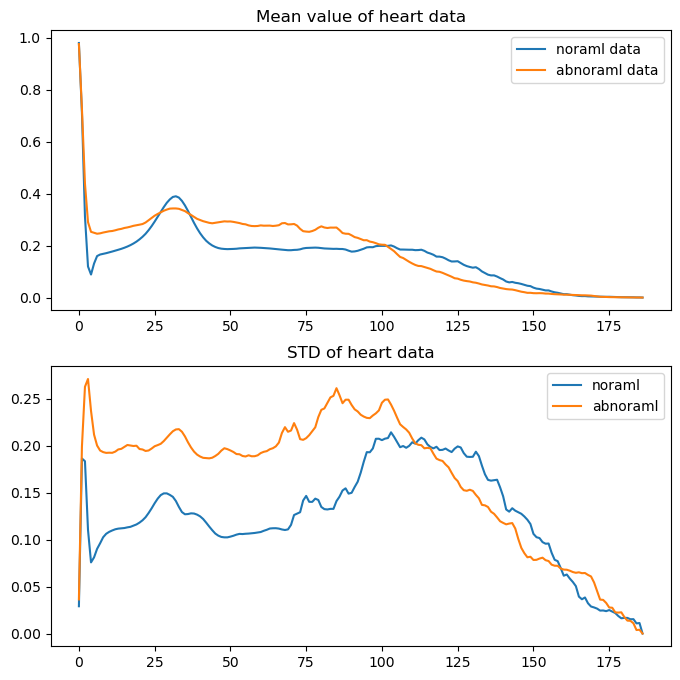

In [3]:
fig , (ax1,ax2) = plt.subplots(2,1, figsize=(8,8))

ax1.plot(normal_data.loc[:,:186].mean(), label='noraml data')
ax1.plot(abnormal_data.loc[:,:186].mean(), label='abnoraml data')
ax1.set_title("Mean value of heart data")
ax1.legend()


ax2.plot(normal_data.loc[:,:186].std(), label='noraml')
ax2.plot(abnormal_data.loc[:,:186].std(), label='abnoraml')
ax2.legend()
ax2.set_title("STD of heart data")

In [4]:
merge_data = pd.concat([abnormal_data, normal_data], axis=0, ignore_index=True)
print(merge_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
None


In [5]:
print(merge_data.head(10))

        0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
5  0.925265  0.433352  0.073620  0.079197  0.136643  0.182934  0.182934   
6  0.999144  0.774829  0.522260  0.250856  0.000000  0.066781  0.093322   
7  1.000000  0.871452  0.678353  0.357262  0.051196  0.000000  0.090707   
8  1.000000  0.729630  0.583333  0.350926  0.279630  0.321296  0.267593   
9  0.932234  0.810440  0.627595  0.422161  0.263126  0.145910  0.109280   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0

In [6]:
print(merge_data.loc[:,187].value_counts())

1.0    10506
0.0     4046
Name: 187, dtype: int64


In [7]:
df0 = merge_data[merge_data[187] == 0]
df1 = merge_data[merge_data[187] == 1]

df0 = resample(df0, replace = True, n_samples = 10506, random_state = 1)


In [8]:
training_data = pd.concat([df0, df1])

In [9]:
X = training_data.loc[:,:186]
y = training_data.loc[:,187]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\Rednax\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predicted_point = model1.predict(X_test)
print('Output values model: ',predicted_point)

Output values model:  [1. 1. 0. ... 0. 0. 1.]


In [16]:
print(f'LR mode accuracy = {model1.score(X_test,y_test)*100:.3}%')

LR mode accuracy = 79.8%


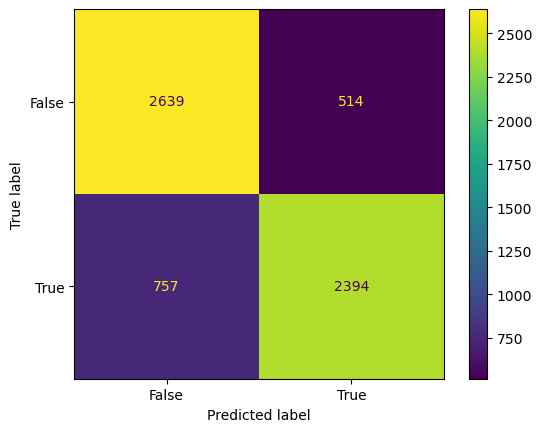

In [15]:
pred = model1.predict(X_test)
cfm = metrics.confusion_matrix(y_test, pred)
plot_data = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])
plot_data.plot()
plt.show()

In [16]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
predicted = model2.predict(X_test)
print('output sample: ', predicted)


output sample:  [1. 1. 0. ... 0. 0. 1.]


In [18]:
print(f' Accuracy of decission tree mode = {model2.score(X_test,y_test)*100:.3}%')

 Accuracy of decission tree mode = 95.1%


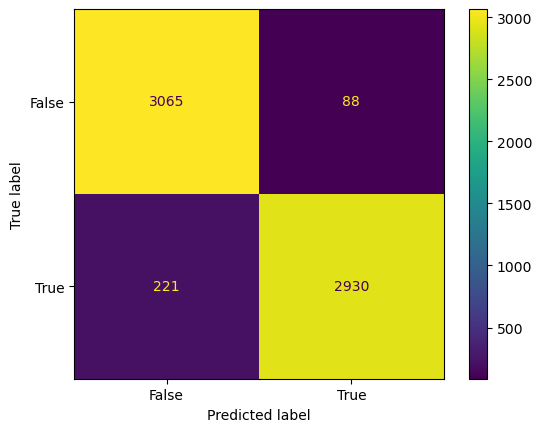

In [19]:
pred = model2.predict(X_test)
cfm = metrics.confusion_matrix(y_test, pred)
plot_data = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])
plot_data.plot()
plt.show()

In [18]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
predicted = model3.predict(X_test)
print('sample output ', predicted)

sample output  [1. 1. 0. ... 0. 0. 1.]


C:\Users\Rednax\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
print(f'Accuracy of KNN model {model3.score(X_test,y_test)*100:.3}%')

Accuracy of KNN model 93.5%


C:\Users\Rednax\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\Rednax\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


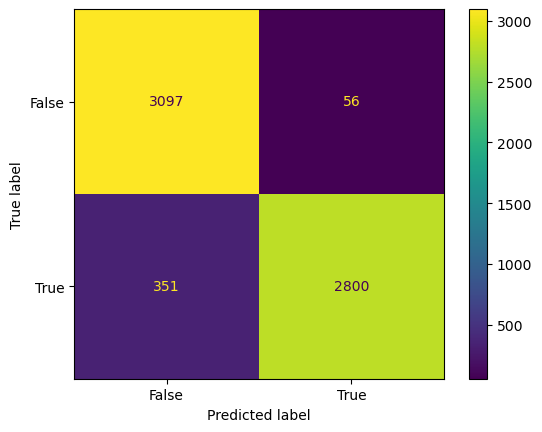

In [21]:
pred = model3.predict(X_test)
cfm = metrics.confusion_matrix(y_test, pred)
plot_data = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])
plot_data.plot()
plt.show()